In [1]:
import os
import pandas as pd 
from urllib import urlretrieve


In [2]:
URL='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv',url=URL):
 if not os.path.exists(filename):
     urlretrieve(URL,filename)
 data=pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True)
 
 return data

In [15]:
data=get_fremont_data()
data.columns=['west','east']
data['total']=data['east']+data['west']
data.head()

,west,east,total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [4]:
import os
import pandas as pd
os.getcwd()
data=pd.read_csv("Fremont.csv",index_col='Date',parse_dates=True)

In [5]:
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


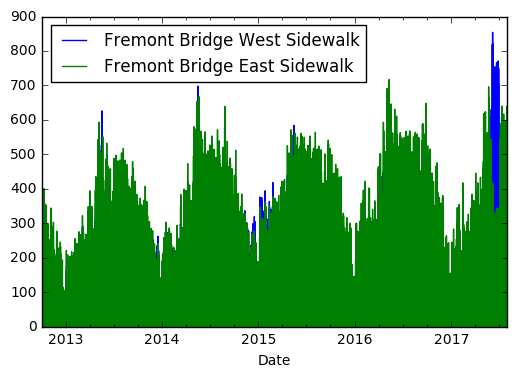

In [6]:
%matplotlib inline
data.plot();

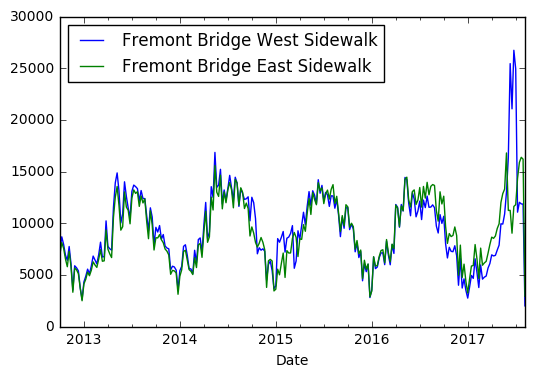

In [7]:
data.resample('W').sum().plot();

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')


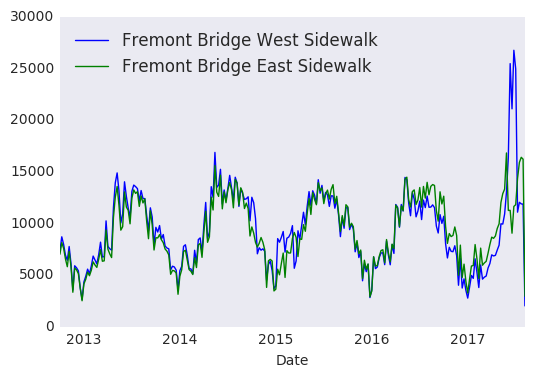

In [9]:

data.resample('W').sum().plot();

(0, 540000.0)

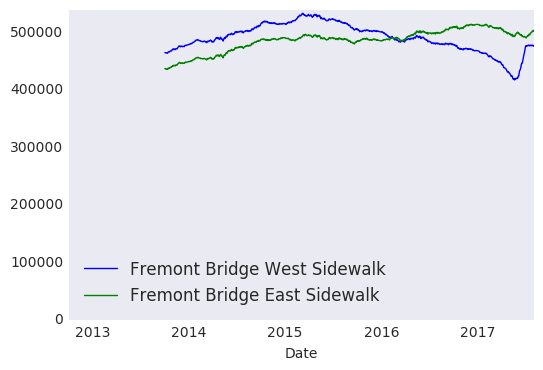

In [10]:

ax=data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None)

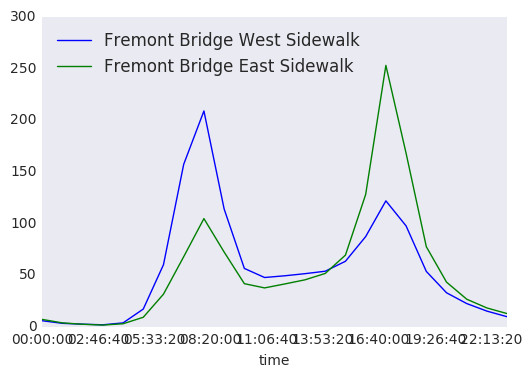

In [11]:
data.groupby(data.index.time).mean().plot();

In [12]:
data.columns


Index([u'Fremont Bridge West Sidewalk', u'Fremont Bridge East Sidewalk'], dtype='object')

In [16]:
pivoted=data.pivot_table('total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0
